In [89]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import matplotlib.gridspec as gridspec
from astropy.time import Time
from astropy import units

## Define the Colors

In [125]:
url = 'https://coolors.co/102F4D-0e385e-074d87-0061b0-0f75cb-1e88e5-2196f3-6ebaf7-95ccf9-bbdefb'
aumic_colors = np.array(['#{0}'.format(i) for i in url.split('/')[-1].split('-')])[np.array([0, 5, -1], dtype=int)]

url = 'https://coolors.co/palette/590d22-800f2f-a4133c-c9184a-ff4d6d-ff758f-ff8fa3-ffb3c1-ffccd5'
vtau_colors = np.array(['#{0}'.format(i) for i in url.split('/')[-1].split('-')])[np.array([2, 4, 7], dtype=int)]

def load_plt_params():
    """ Load in plt.rcParams and set (based on paper defaults).
    """
    params = Table.read('rcParams.txt', format='csv')
    for i, name in enumerate(params['name']):
        try:
            plt.rcParams[name] = float(params['value'][i])
        except:
            plt.rcParams[name] = params['value'][i]
    return params

load_plt_params();

## Load in the Data

In [75]:
## Light curves for V1298 Tau c ##
vtau_all = Table.read('v1298tauc_all_lcs.csv', format='csv')
vtau_avg = Table.read('v1298tauc_avg_lc.csv', format='csv')

## Light curves for AU Mic b ##
aumic_all = Table.read('aumicb_all_lcs.csv', format='csv')
aumic_avg = Table.read('aumicb_avg_lc.csv', format='csv')
aumic_all_wflr = Table.read('aumicb_all_lcs_wflares.csv', format='csv')

fmask = np.load('aumic_flare_mask.npy')

## AU Mic b transit times

In [146]:
def prop_error(vals):
    err = np.sqrt(np.nansum((vals-np.nanmean(vals))**2)/(len(vals)-1))
    return err

midpoint_1 = np.array([2459362.86254, 2459362.87127, 2459362.86697, 
                       2459362.86884, 2459362.89635, 2459362.86595])
unc_1 = np.array([0.04072, 0.0837, 0.04114, 0.11863, 0.04571, 0.04543])

midpoint_2 = np.array([2459481.34356, 2459481.35327, 2459481.34841, 
                       2459481.35000, 2459481.38073, 2459481.34711])
unc_2 = np.array([0.04094, 0.08504, 0.04142, 0.11864, 0.04611, 0.04557])

midpoint_3 = np.array([2459862.17541, 2459862.18827, 2459862.18161, 
                       2459862.18230, 2459862.22338, 2459862.17941])
unc_3 = np.array([0.04178, 0.09013, 0.04251, 0.11864, 0.04763, 0.04613])

aumic_predicted_Tc = np.array([np.nanmean(midpoint_1), np.nanmean(midpoint_2), np.nanmean(midpoint_3)])-2400000.5
aumic_predicted_Tc_err = np.array([prop_error(midpoint_1), prop_error(midpoint_2),
                                   prop_error(midpoint_3)])

dur = 3.4927
aumic_predicted_ingress = predicted_Tc - ((dur/2)*units.hour).to(units.day).value
aumic_predicted_egress  = predicted_Tc + ((dur/2)*units.hour).to(units.day).value

aumic_dates = ['2021-05-28', '2021-09-23', '2022-10-09']

## V1298 Tau c transit times

In [139]:
vtau_predicted_Tc = np.array([2459571.90279, 2459596.65227, 2459613.15229, 2459786.41361])-2400000.5  #MJD

vtau_predicted_ingress = Time(['2021-12-23 07:13', '2022-01-17 01:12', 
                          '2022-02-02 13:12', '2022-07-25 19:28']).mjd
vtau_predicted_egress  = Time(['2021-12-23 12:06', '2022-01-17 06:06', 
                         '2022-02-02 18:06', '2022-07-26 00:22']).mjd

vtau_dates = ['2022-01-17', '2022-02-02', '2022-07-25']

# Paper Figure

/var/folders/f_/_5_3lcsn1tldpx3p_pzss7m000c7ym/T/ipykernel_99559/1995662209.py:140: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  plt.savefig('figure1.pdf', dpi=300, bbox_inches='tight')


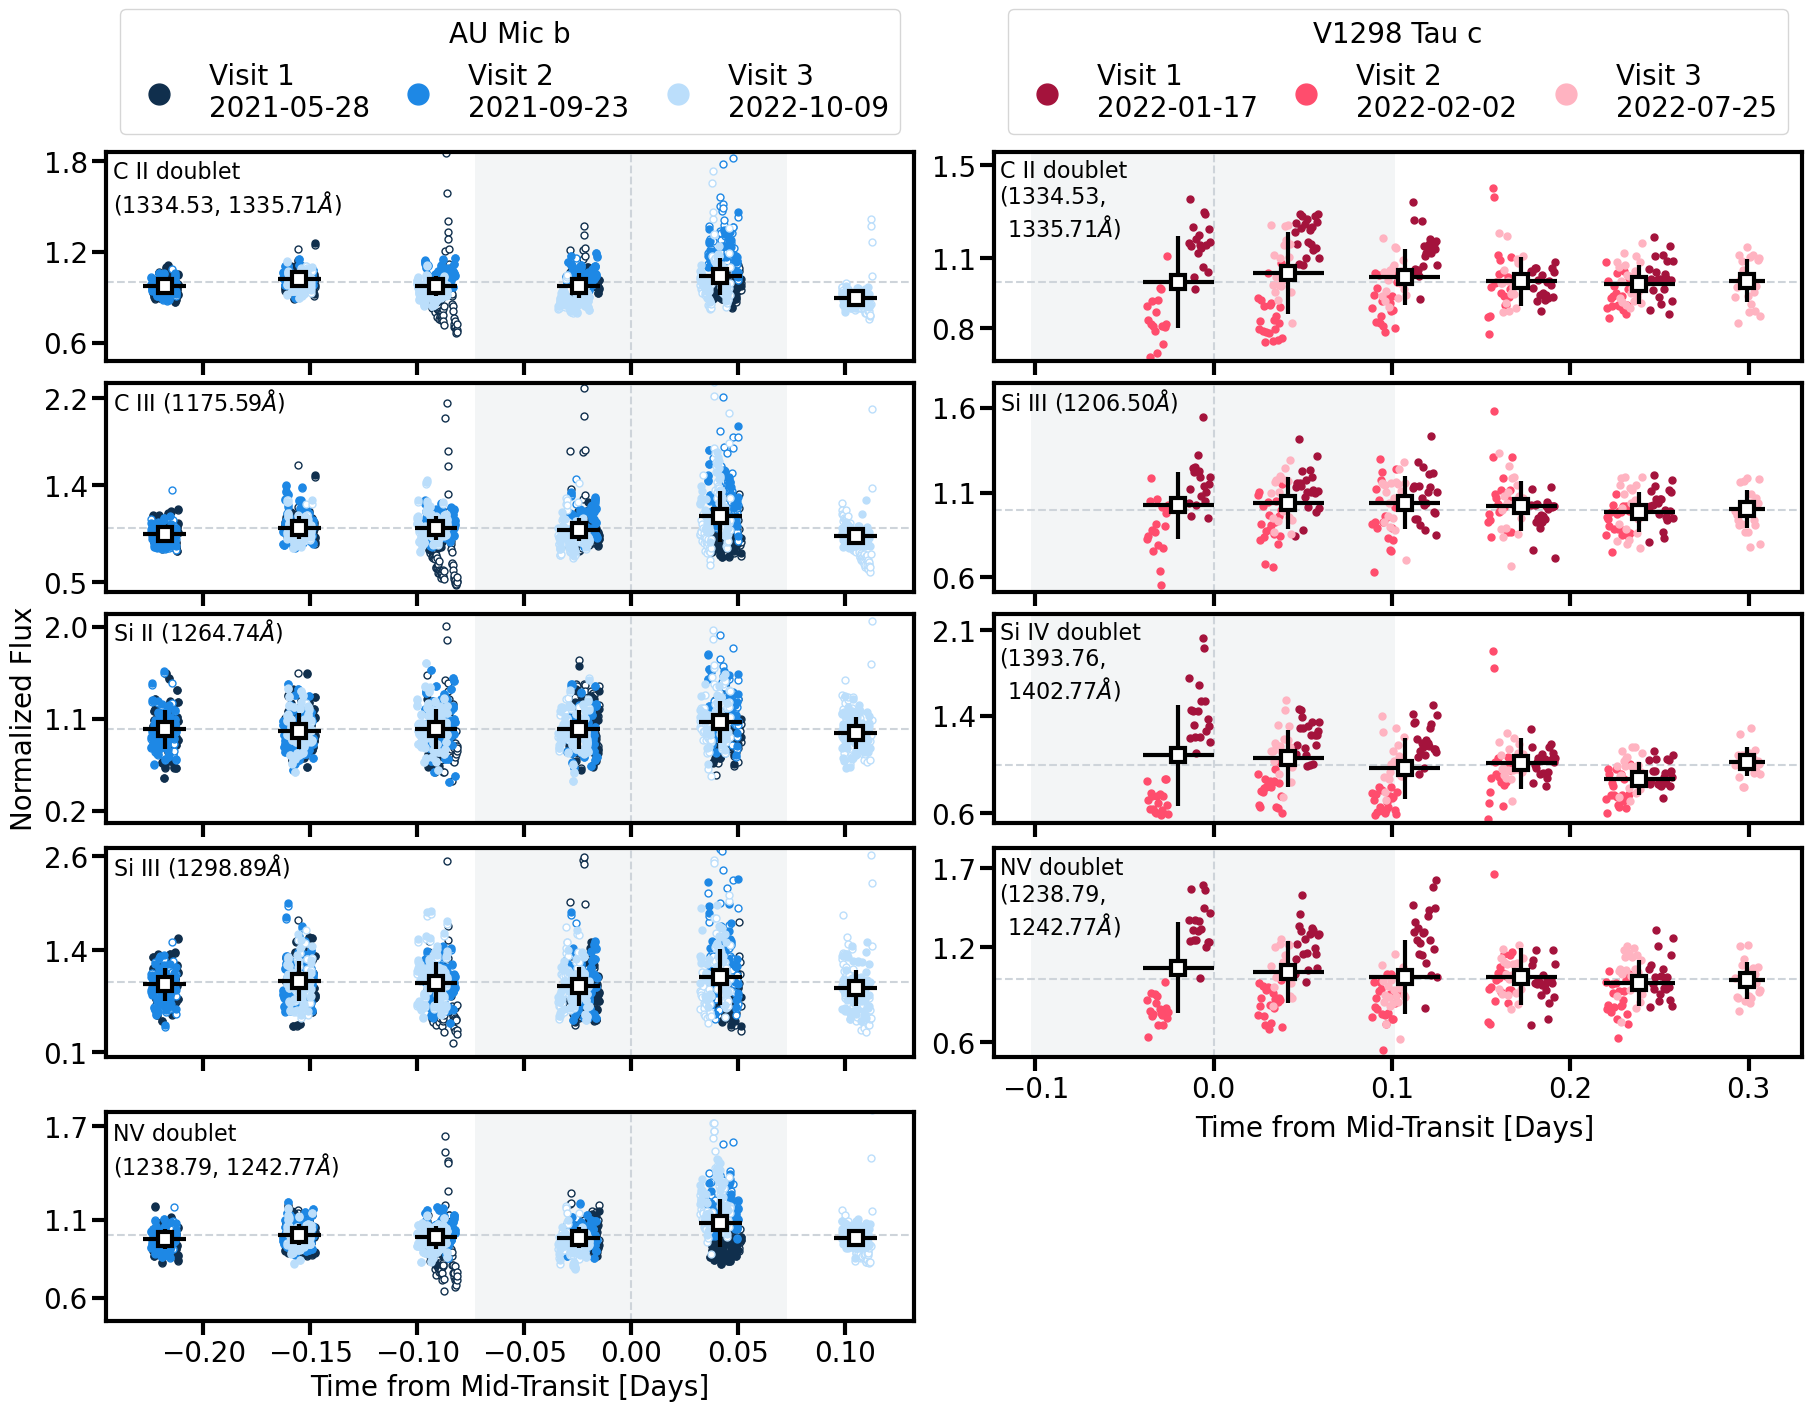

In [226]:
fig = plt.figure(layout='constrained', figsize=(18,14))
gs0 = gridspec.GridSpec(5, 2, figure=fig)

ms=10

for n in range(9):
    ax = fig.add_subplot(gs0[n])
    
    if n == 0:
        micax = [ax]
    elif n == 1:
        tauax = [ax]
    else:
        if (n > 1) and (n%2==0):
            micax.append(ax)
        else:
            tauax.append(ax)
            
extra = fig.add_subplot(gs0[9])

##################
## FOR AU MIC b ##
##################
ion_labels = ['C II doublet\n(1334.53, 1335.71$\AA$)', 
              'C III (1175.59$\AA$)', 
              'Si II (1264.74$\AA$)', 
              'Si III (1298.89$\AA$)', 
              'NV doublet\n(1238.79, 1242.77$\AA$)']
for i, ion in enumerate(['CII_combined', 'CIII', 'SiII', 'SiIII_3', 'NV_combined']):
    
    micax[i].axvspan(aumic_predicted_ingress[2]-aumic_predicted_Tc[2],
                     aumic_predicted_egress[2]-aumic_predicted_Tc[2], 
                     color='#e9ecef', lw=0, alpha=0.5, zorder=0)
    micax[i].axhline(1, color='#ced4da', linestyle='--')
    micax[i].axvline(0, color='#ced4da', linestyle='--')
    
    for j in range(1,4):
        micax[i].errorbar(aumic_all_wflr['{0}_visit{1:02d}_phase'.format(ion, j)],
                          aumic_all_wflr['{0}_visit{1:02d}_flux'.format(ion, j)],
                          marker='.', linestyle='', markeredgecolor=aumic_colors[j-1],
                          c='w', ms=ms)
        
        
        micax[i].errorbar(aumic_all['{0}_visit{1:02d}_phase'.format(ion, j)],
                          aumic_all['{0}_visit{1:02d}_flux'.format(ion, j)],
                          marker='.', linestyle='', c=aumic_colors[j-1],
                          label='Visit {0}\n{1}'.format(j, aumic_dates[j-1]), ms=ms)

    micax[i].errorbar(aumic_avg['{0}_phase'.format(ion)],
                      aumic_avg['{0}_flux'.format(ion)],
                      yerr=aumic_avg['{0}_flux_err'.format(ion)],
                      xerr=np.full(6, 0.01),
                      marker='s', linestyle='', markeredgecolor='k', 
                      ecolor='k', color='w', ms=ms, markeredgewidth=3,
                      zorder=100, lw=3)
        
    if i < 4:
        micax[i].set_xticklabels([])
    else:
        micax[i].set_xlabel('Time from Mid-Transit [Days]')
        
    if i == 0:
        micax[i].legend(ncols=3, bbox_to_anchor=(0., 1.02, 1., .102),
                        loc=3, mode='expand', markerscale=3, title='AU Mic b')
    if i == 2:
        micax[i].set_ylabel('Normalized Flux')
        
    ymin = np.nanmin(aumic_all['{0}_visit02_flux'.format(ion)])-0.4
    ymax = np.nanmax(aumic_all['{0}_visit02_flux'.format(ion)])+0.4
    micax[i].set_ylim(ymin, ymax)
    micax[i].set_yticks(np.round(np.linspace(ymin+0.1, ymax-0.1, 3),1))
    
    if i == 0 or i == 4:
        micax[i].text(s=ion_labels[i], x=-0.242, y=ymax-0.4, fontsize=16)
    elif i == 1 or i == 2:
        micax[i].text(s=ion_labels[i], x=-0.242, y=ymax-0.25, fontsize=16)
    else:
        micax[i].text(s=ion_labels[i], x=-0.242, y=ymax-0.34, fontsize=16)
    
    micax[i].set_rasterized(True)
        
        
#####################
## FOR V1298 TAU c ## 
#####################
ion_labels = ['C II doublet\n(1334.53,\n 1335.71$\AA$)',
              'Si III (1206.50$\AA$)',
              'Si IV doublet\n(1393.76,\n 1402.77$\AA$)',
              'NV doublet\n(1238.79,\n 1242.77$\AA$)']
for i, ion in enumerate(['CII_combined', 'SiIII_1', 'SiIV_combined', 'NV_combined']):
    
    tauax[i].axvspan(vtau_predicted_ingress[2]-vtau_predicted_Tc[2],
                     vtau_predicted_egress[2]-vtau_predicted_Tc[2], 
                     color='#e9ecef', lw=0, alpha=0.5, zorder=0)
    tauax[i].axhline(1, color='#ced4da', linestyle='--')
    tauax[i].axvline(0, color='#ced4da', linestyle='--')
    
    for j in range(2,5):
        tauax[i].errorbar(vtau_all['{0}_visit{1:02d}_phase'.format(ion, j)],
                          vtau_all['{0}_visit{1:02d}_flux'.format(ion, j)],
                          marker='.', linestyle='', c=vtau_colors[j-2],
                          label='Visit {0}\n{1}'.format(j-1, vtau_dates[j-2]), ms=ms)
        
    tauax[i].errorbar(vtau_avg['{0}_phase'.format(ion)],
                      vtau_avg['{0}_flux'.format(ion)],
                      yerr=vtau_avg['{0}_flux_err'.format(ion)],
                      xerr=[0.02, 0.02, 0.02, 0.02, 0.02, 0.01],
                      marker='s', linestyle='', markeredgecolor='k', 
                      ecolor='k', color='w', ms=ms, markeredgewidth=3,
                      zorder=100, lw=3)
    
    if i < 3:
        tauax[i].set_xticklabels([])
        
    if i == 0:
        tauax[i].legend(ncols=3, bbox_to_anchor=(0., 1.02, 1., .102),
                        loc=3, mode='expand', markerscale=3, title='V1298 Tau c')
        
    ymin = np.nanmin(vtau_all['{0}_visit02_flux'.format(ion)])-0.2
    ymax = np.nanmax(vtau_all['{0}_visit02_flux'.format(ion)])+0.2
    tauax[i].set_ylim(ymin, ymax)
    tauax[i].set_yticks(np.round(np.linspace(ymin+0.1, ymax-0.1, 3),1))
    
    if i == 3:
        tauax[i].text(s=ion_labels[i], x=-0.12, y=ymax-0.54, fontsize=16)
    elif i == 0:
        tauax[i].text(s=ion_labels[i], x=-0.12, y=ymax-0.36, fontsize=16)
    elif i == 1:
        tauax[i].text(s=ion_labels[i], x=-0.12, y=ymax-0.16, fontsize=16)
    else:
        tauax[i].text(s=ion_labels[i], x=-0.12, y=ymax-0.69, fontsize=16)
        
    tauax[i].set_rasterized(True)
    
extra.text(s='Time from Mid-Transit [Days]', x=0, y=0.15)
extra.set_xlim(-0.033,0.1)
extra.set_ylim(-1, 0.3)
extra.axis('off')
    
plt.savefig('figure1.pdf', dpi=300, bbox_inches='tight')